# Pre-installation

* Set up python libraries: numpy, pandas, seaborn, pingouin, scipy, statannot and matplotlib
* Copy and paste the dataset to the $data$ directory that we prepared

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import os
from statannot import add_stat_annotation
from scipy.stats import binned_statistic
sns.set(style="dark",font_scale=1.2)


c:\users\delsys\musec\env\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# Behaviors

In [2]:
df_behaviors = pd.read_csv('./data/behaviors.csv')
df_behaviors.head(5)

,CSV,Audio,Familiarity,Times,ResponseRate,Labels
0,s001_gtec_melody_01_070.csv,melody,0.390110,20.69785,0.048314,non_favored
1,s001_gtec_melody_02_057.csv,melody,0.552198,12.39428,0.080682,non_favored
2,s001_gtec_melody_03_109.csv,melody,0.436813,13.09684,0.076354,non_favored
3,s001_gtec_melody_06_042.csv,melody,0.667582,5.42047,0.184486,non_favored
4,s001_gtec_melody_07_008.csv,melody,0.859890,9.79309,0.102113,non_favored


## Statistical behaviors
- Showing the Fig 4. in our paper by using Behaviors.csv

In [3]:
def mann_whitney_plot(data, dv):
    """
    dv : dependent variables
    """
    
    fig, ax = plt.subplots(figsize=(9,7))
    sns.boxplot(x='Audio',
                y=dv,
                hue='Labels',
                palette='PRGn',
                width=0.8,
                saturation=1,
                linewidth=3,
                data=data)

    if dv == 'Familiarity':
        ax.set_yticklabels(['-1', '', '0', '', '1'], fontsize=15) #Familiarity
        ax.yaxis.set_label_coords(-0.07,0.41)
        ax.set_ylim(-1.2, 1.2)
        plt.legend(loc=(0.75,0.25), fontsize=13, frameon=False) #title="Status"

    elif dv == 'ResponseRate':
        ax.set_yticklabels(['0', '', '', '', '', '0.27'], fontsize=15) #Familiarity
        ax.yaxis.set_label_coords(-0.07,0.37)
        plt.legend(loc='best', fontsize=13, frameon=False,) #title="Status"

        
    ax.set_xticklabels(['Melody', 'Song'], fontsize=15)
    plt.xlabel('', fontsize=15 )
    plt.ylabel(dv, fontsize=15 ) #Familiarity
 
    add_stat_annotation(ax,
                        data=data,
                        x='Audio',
                        y=dv,
                        hue='Labels',
                        comparisons_correction=None,
                        box_pairs=[(('melody','non_favored') , ('song', 'non_favored')),
                                   (('melody','favored') , ('melody', 'non_favored')),    
                                   (('song','favored') , ('song', 'non_favored'))],
                        test='Mann-Whitney',
                        text_format='star',
                        loc='inside',
                        line_offset_to_box=0.1,
                        verbose=2,
                        pvalues=None,
                        color='0.2',
                        fontsize='large',
                        pvalue_thresholds=[[1e-4, "*"], [1e-3, "*"], [1e-2, "*"], [0.05, "*"], [1, '']],
                        linewidth=1.5)
    sns.despine(trim=True)

### 1. Familiarity 

c:\users\delsys\musec\env\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


p-value annotation legend:
: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
*: 1.00e-03 < p <= 1.00e-02
*: 1.00e-04 < p <= 1.00e-03
*: p <= 1.00e-04

song_non_favored v.s. song_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=3.107e-09 U_stat=6.238e+03
melody_non_favored v.s. melody_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=3.351e-13 U_stat=5.132e+03
melody_non_favored v.s. song_non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.614e-02 U_stat=3.234e+04


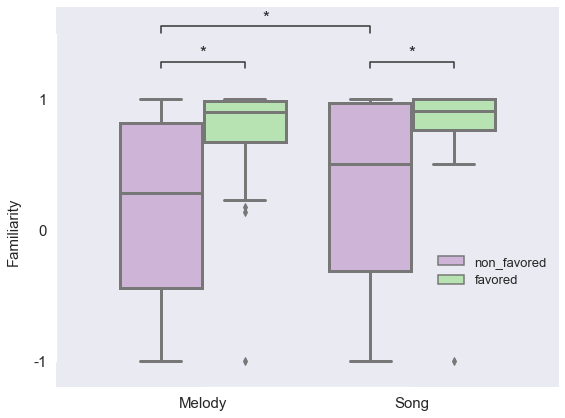

In [4]:
mann_whitney_plot(df_behaviors, 'Familiarity')

### 2. Response Rate 

c:\users\delsys\musec\env\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


p-value annotation legend:
: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
*: 1.00e-03 < p <= 1.00e-02
*: 1.00e-04 < p <= 1.00e-03
*: p <= 1.00e-04

song_non_favored v.s. song_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.968e-05 U_stat=1.441e+04
melody_non_favored v.s. melody_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=6.351e-03 U_stat=1.317e+04
melody_non_favored v.s. song_non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=5.936e-04 U_stat=3.046e+04


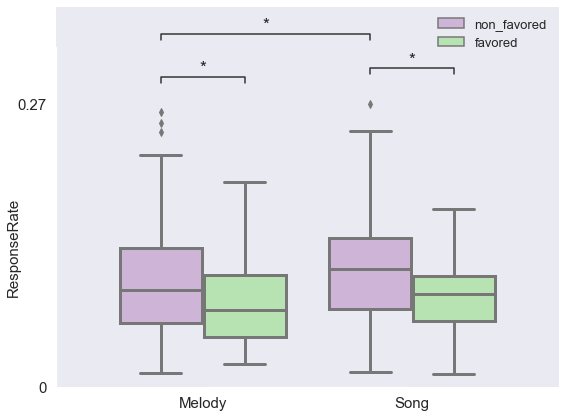

In [5]:
mann_whitney_plot(df_behaviors, 'ResponseRate')

# **EEG** #

In [6]:
eeg_files = os.listdir('./data/favored/favored_song/') # Checking the EEG files of favored song
eeg_files # Now, we demonstrate the 3 files only.

['s001_gtec_song_20_030.csv',
 's002_gtec_song_10_082.csv',
 's002_gtec_song_15_016.csv']

# **EEG and Behaviors**

- Example of matching the EEG  with its Behaviors of 1 music 
- The result showed the data of s001_gtec_song_20_030.csv as follows:
  - Audio: Song
  - Labels: Favored
  - Familiarity: 0.917852
  - Times: 27.67199
  - ResponseRate: 0.036138
  - EEG, EOG raw dataframe and visualization.

                           CSV Audio  Familiarity     Times  ResponseRate  \
623  s001_gtec_song_20_030.csv  song     0.909341  15.64014      0.063938   

      Labels  
623  favored  




,AFz,Fz,Fp1,Fp2,AF7,AF5,AF3,AF4,AF6,AF8,...,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,VEOG,HEOG
0,-10107.863281,-11989.121094,-13905.757812,-14704.941406,-14221.578125,-14889.109375,-14549.882812,-17095.613281,-10261.835938,-27331.941406,...,-12248.054688,-15788.273438,-13397.390625,-11725.925781,-18643.041016,-12358.726562,-13292.226562,-14007.203125,-165404.906250,-184582.203125
1,-10108.261719,-11989.917969,-13905.128906,-14704.566406,-14222.859375,-14887.921875,-14550.230469,-17095.140625,-10262.253906,-27332.060547,...,-12249.648438,-15789.695312,-13399.863281,-11727.546875,-18645.410156,-12361.589844,-13295.691406,-14010.539062,-165406.171875,-184582.625000
2,-10108.960938,-11990.816406,-13906.421875,-14704.671875,-14224.433594,-14887.464844,-14551.347656,-17095.365234,-10261.398438,-27331.503906,...,-12250.398438,-15791.242188,-13401.074219,-11729.183594,-18647.148438,-12363.425781,-13297.917969,-14012.546875,-165405.031250,-184583.125000
3,-10106.875000,-11990.316406,-13905.464844,-14704.144531,-14224.433594,-14886.777344,-14549.734375,-17093.693359,-10259.125000,-27329.736328,...,-12249.441406,-15790.488281,-13401.011719,-11728.500000,-18645.880859,-12362.558594,-13296.828125,-14011.105469,-165399.375000,-184580.593750
4,-10102.703125,-11986.933594,-13902.078125,-14701.746094,-14222.863281,-14884.742188,-14546.644531,-17090.371094,-10256.714844,-27327.986328,...,-12247.132812,-15786.898438,-13397.695312,-11725.699219,-18641.755859,-12358.257812,-13293.296875,-14007.230469,-165395.156250,-184577.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63534,-10241.703125,-12142.742188,-13977.804688,-14720.179688,-14319.917969,-14977.832031,-14663.769531,-17131.097656,-10235.175781,-27336.414062,...,-12282.167969,-15873.953125,-13403.343750,-11702.378906,-18674.404297,-12415.109375,-13355.546875,-14023.496094,-165467.359375,-184672.015625
63535,-10242.281250,-12144.125000,-13978.847656,-14718.792969,-14321.687500,-14979.015625,-14665.796875,-17130.685547,-10234.445312,-27336.199219,...,-12283.066406,-15874.390625,-13405.015625,-11703.523438,-18674.761719,-12415.351562,-13355.921875,-14025.386719,-165467.515625,-184671.625000
63536,-10242.757812,-12145.242188,-13977.859375,-14717.964844,-14321.843750,-14979.339844,-14667.148438,-17129.404297,-10233.406250,-27335.939453,...,-12286.476562,-15876.656250,-13406.890625,-11704.562500,-18675.289062,-12417.511719,-13358.054688,-14027.699219,-165469.421875,-184671.656250
63537,-10243.058594,-12144.093750,-13976.875000,-14717.429688,-14321.074219,-14977.750000,-14668.023438,-17129.337891,-10232.921875,-27335.966797,...,-12287.128906,-15877.585938,-13407.128906,-11705.980469,-18676.490234,-12418.789062,-13359.761719,-14027.042969,-165470.781250,-184673.593750


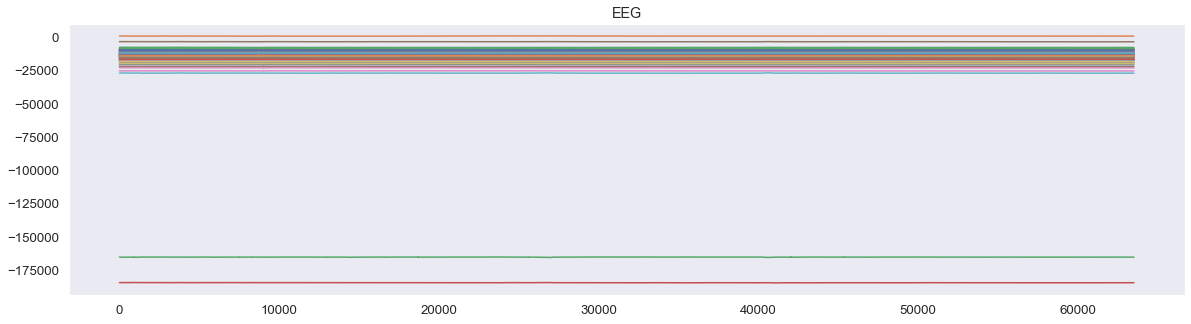

In [7]:
df_eeg = pd.read_csv(f'./data/favored/favored_song/{eeg_files[0]}')
print (df_behaviors[df_behaviors['CSV'] == eeg_files[0]])
print ('\n')

df_eeg.plot(legend=False, title='EEG', figsize=(20,5))
df_eeg